In [102]:
import numpy as np
import matplotlib.pyplot as plt 
import copy

# Multiple Linear Regression
## Goals 
- Extend our regression model  routines to support multiple features
- Extend data structures to support multiple features
- Rewrite prediction, cost and gradient routines to support multiple features

# Problem Statement
I will use the example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178         

I will build a linear regression model using these values so you can then predict the price for other houses.  | 

In [7]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [13]:
# data is stored in a numpy matrix 
print(f"X Shape :{x_train.shape}, X type {type(x_train)}")
print(x_train)

print(f"y Shape :{y_train.shape}, Y type {type(y_train)}")
print(y_train)

X Shape :(3, 4), X type <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape :(3,), Y type <class 'numpy.ndarray'>
[460 232 178]


## 2.2 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column v
 
* $b$ is a scalar parameter.  ector

For demonstration, $\mathbf{w}$ and $b$ will be loaded with some initial selected values that are near the optimal. $\mathbf{w}$ is a 1-D NumPy vector.

In [18]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


# Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

# Single Prediction element by element
Our previous prediction multiplied one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.

In [46]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p = p + w[i] * x[i]
    p = p+ b
    return p

In [48]:
X_Sample = x_train[0,:] # single observation for prediction 
print(f"X_Sample shape: {X_Sample.shape}, X_Sample value = {X_Sample}")

# make a prediction using initial parameters 
p = predict_single_loop(X_Sample, w_init, b_init)
print(f"Prediction : {p:4f}")

X_Sample shape: (4,), X_Sample value = [2104    5    1   45]
Prediction : 459.999998


## Single Prediction, vector

Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions.

In [52]:
def predict_using_dot(x, w, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    return np.dot(x, w) + b

## Using .dot

In [56]:
X_Sample = x_train[0,:] # single observation for prediction 
print(f"X_Sample shape: {X_Sample.shape}, X_Sample value = {X_Sample}")

# make a prediction using initial parameters 
p = predict_using_dot(X_Sample, w_init, b_init)
print(f"Prediction : {p:4f}")

X_Sample shape: (4,), X_Sample value = [2104    5    1   45]
Prediction : 459.999998


# Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [61]:
def compute_cost(x, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = x.shape[0]
    sum = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        sum = sum + (f_wb - y[i])**2
    cost = sum / (2*m)
    return cost

In [66]:
y_pred = []
m = x_train.shape[0]
for i in range(m):
    y_pred.append(predict_using_dot(x_train[i], w_init, b_init))

y_pred

[459.9999976194083, 231.9999983694081, 177.99999898940825]

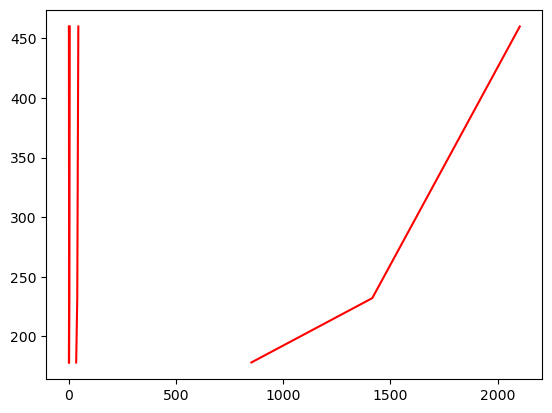

In [68]:
plt.plot(x_train, y_pred, c='r')

# Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ s the target value


##  Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [97]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i][j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [99]:
temp_dj_dw , temp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f"dj_dw at initial w, b: {temp_dj_dw}")
print(f"dj_db at initial w, b: {temp_dj_db}")

dj_dw at initial w, b: [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]
dj_db at initial w, b: -1.6739251122999121e-06


In [122]:
def gradient_descent(x, y, w_in, b_in, cost_fun, gradient_fun, alpha, n_of_iter):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    # cost function history
    j_hist = []
    p_hist = []
    w=copy.deepcopy(w_in)
    b=copy.deepcopy(b_in)
    for i in range(n_of_iter):
        cur_cost = cost_fun(x, y, w, b)
        j_hist.append(cur_cost)
        p_hist.append([[w], b])
        cur_dj_dw, cur_dj_db = gradient_fun(x, y, w, b)
        w = w - alpha * cur_dj_dw
        b = b - alpha * cur_dj_db
        if i%(100) == 0:
            print(f"iter :{i}, and cost :{cur_cost}")
    return w, b, j_hist

In [124]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

iter :0, and cost :49518.0
iter :100, and cost :696.0010595124639
iter :200, and cost :694.9313476914755
iter :300, and cost :693.8709864577189
iter :400, and cost :692.8198930237821
iter :500, and cost :691.7779853352557
iter :600, and cost :690.7451820642364
iter :700, and cost :689.7214026029072
iter :800, and cost :688.7065670571469
iter :900, and cost :687.7005962402227
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


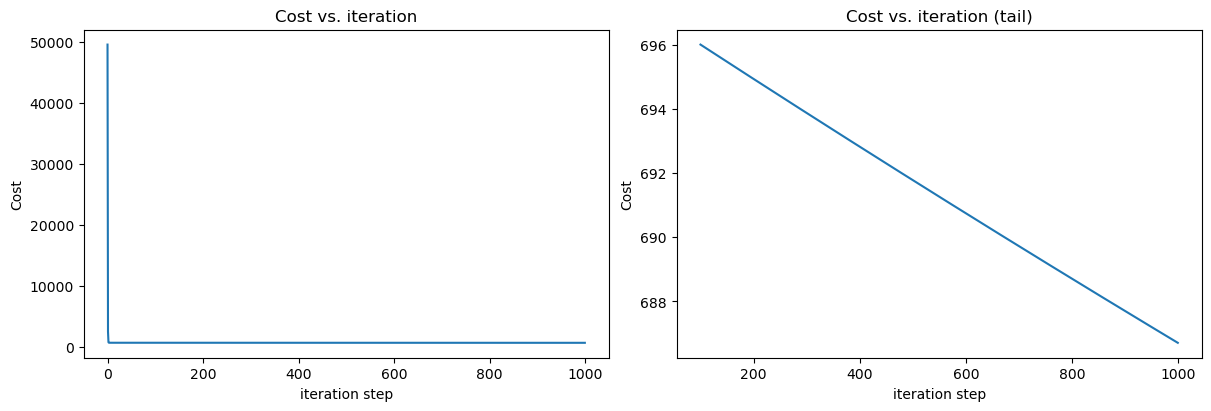

In [132]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()